## SyrialTel Customer Churn

### Problem Statement: Predicting Customer Churn for SyriaTel
`Customer Churn` refers to the phenomenon where customers stop using a company's products or services. In telecommunications industry, churn occurs when a subscriber cancels their service, switches to a competitor, or stops engaging with the company altogether

For Syrialtel, a telcom provider, high churn rates lead to significant revenue losses, increased customer acquisition costs, and a weakened market position.Retaining existing customers is generally more cost-effective than acquiring new ones, making churn prediction a critical business priority.

### Disadvantages of Customer Churn:
1. Revenue loss - Losing customers reduces recurring revenue, impacting overall profitability
2. Higher Acquisition Costs - Acquiring new customers is often more expensive than retaining existiong ones.
3. Reputational Damage - High churn ratess may inidcate poor service quality,leading to negative word-of-mouth
4. Reduced Customer Lifetime Value (CLV) - Frequent customer exits lower the long-tern revenue a company can generate from each user
5. Operational Inefficiencies - constantly replacing lost customers requires continous marketing and sales efforts, increase costs

### Objective
The goal is to build a predictive model that identifies customers who are likely to churn in the near future. By analyzing patterns in customer behaviour, the company can implement targeted retetion strategies, such as personalized offers, improved customer support, or proactive engagement, to reduced churn and enhance customer loyalty

### 1.0 Import Libraries


In [114]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import numpy as np

from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder,StandardScaler,FunctionTransformer
from sklearn.metrics import classification_report,roc_auc_score,accuracy_score,precision_score,recall_score,f1_score,roc_curve
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as ImbPipeline
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import cross_val_score,StratifiedKFold

### 2.0 Understanding the dataset

In [2]:
#Read file from the csv as a dataframe and display the first 5 rows
df = pd.read_csv('CustomerChurnData.csv')
df.head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


### Data Description /Features in the Dataset
This features will help in determining if there is a pattern in customers that have churned versus customers that have not

- `state` : state the customer lives in
- `Account length` : The number of days the customer has had the account
- `Area code` : the area code of the customer
- `Phone number` : The phone number of the customer
- `Internation plan` : true if the customer has the international plan, otherwise false
- `Voice mail plan` : true if the customer has the voice mail plan, otherwise false
- `number vmail messages` : Number of voicemails the customer has sent
- `total day minutes` : total number of minutes the customer has used in calls made during the day
- `total day calls` : total number of calls the user has done during the day
- ` total day charge` : total amount of money the customer was charged by the Telecom company for calls made during the day
- `total eve minutes` : total number of minutes the customer has used in calls made in the evening
- `total eve calls` : total number of calls the user has done in the evening
- `total eve charge` : total amount of money the customer was charged by the Telecom company for calls made in the evening
- `total night minutes` : total number of minutes the customer has used during the night 
- `total night calls` : total number of calls the user has done during the night
- `total night charge` : total amount of money the customer was charged by the Telecom company for calls made at night`
- `total intl minutes`: total number of minutes the user has been in international calls
- `total intl calls` : total number of international calls the customer has done 
- `total intl charge`: total amount of monye the customer was charged by the Telcom company for international calls
- `customer service calls` : number of calls the customer has mase to customer service
- `churn` - true if the customer terminated their contract, otherwise false

In [3]:
# Check the number of records and features using the .shape method
print(f'The dataset has {df.shape[0]} rows')
print(f'The dataset has {df.shape[1]} columns')

The dataset has 3333 rows
The dataset has 21 columns


In [4]:
#check information of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account length          3333 non-null   int64  
 2   area code               3333 non-null   int64  
 3   phone number            3333 non-null   object 
 4   international plan      3333 non-null   object 
 5   voice mail plan         3333 non-null   object 
 6   number vmail messages   3333 non-null   int64  
 7   total day minutes       3333 non-null   float64
 8   total day calls         3333 non-null   int64  
 9   total day charge        3333 non-null   float64
 10  total eve minutes       3333 non-null   float64
 11  total eve calls         3333 non-null   int64  
 12  total eve charge        3333 non-null   float64
 13  total night minutes     3333 non-null   float64
 14  total night calls       3333 non-null   

They are no missing values in the dataset.The object types colums will be one-hot encododed to integers prior to modelling

The target variable is churn. It is a binary variable(yes/no) hence we'll be solving a classification problem

In [5]:
#confirming they are no missing values
df.isna().sum()

state                     0
account length            0
area code                 0
phone number              0
international plan        0
voice mail plan           0
number vmail messages     0
total day minutes         0
total day calls           0
total day charge          0
total eve minutes         0
total eve calls           0
total eve charge          0
total night minutes       0
total night calls         0
total night charge        0
total intl minutes        0
total intl calls          0
total intl charge         0
customer service calls    0
churn                     0
dtype: int64

In [6]:
#check data statistics for numerics
df.describe().T

,count,mean,std,min,25%,50%,75%,max
account length,3333.0,101.064806,39.822106,1.00,74.00,101.00,127.00,243.00
area code,3333.0,437.182418,42.371290,408.00,408.00,415.00,510.00,510.00
number vmail messages,3333.0,8.099010,13.688365,0.00,0.00,0.00,20.00,51.00
total day minutes,3333.0,179.775098,54.467389,0.00,143.70,179.40,216.40,350.80
total day calls,3333.0,100.435644,20.069084,0.00,87.00,101.00,114.00,165.00
total day charge,3333.0,30.562307,9.259435,0.00,24.43,30.50,36.79,59.64
total eve minutes,3333.0,200.980348,50.713844,0.00,166.60,201.40,235.30,363.70
total eve calls,3333.0,100.114311,19.922625,0.00,87.00,100.00,114.00,170.00
total eve charge,3333.0,17.083540,4.310668,0.00,14.16,17.12,20.00,30.91
total night minutes,3333.0,200.872037,50.573847,23.20,167.00,201.20,235.30,395.00


In [7]:
total_day_charge_per_min = (df['total day charge']/df['total day minutes']).mean()
total_eve_charge_per_min = (df['total eve charge']/df['total eve minutes']).mean()
total_night_charge_per_min = (df['total night charge']/df['total night minutes']).mean()
total_intl_charge_per_min = (df['total intl charge']/df['total intl minutes']).mean()
print(f'total_day_charge_per_min: {total_day_charge_per_min}')
print(f'total_eve_charge_per_min: {total_eve_charge_per_min}')
print(f'total_night_charge_per_min: {total_night_charge_per_min}')
print(f'total_intl_charge_per_min: {total_intl_charge_per_min}')

total_day_charge_per_min: 0.1700032343416007
total_eve_charge_per_min: 0.08500117298813906
total_night_charge_per_min: 0.045000345702212
total_intl_charge_per_min: 0.27005654558216496


- Customer that stayed for long with the company is 243 days and on average 101 days.
- on average voice mail messages 0 showing that voice mail messages are not as frequent
- Phone calls last longer in the evening and at night. We also see that that night time calling is the cheapest(0.045 Euros per min), followed by evening which is almost double( 0.085 Euros per min) and during the days almost four times compared to night time(0.17 Euros per min). Lesser international calls are made probably due to high ratings(0.27 Euros per min)
- Customer service calls on average are low (1 call) whixh could mean overall customer satisafaction but maximum of 9  could show customer disatisfaction.
- We will also need to scale the data due to the different scales used in the dataset as shown by the min and max values for each columns

In [8]:
#statitiscs for strings
df.describe(include='O')

,state,phone number,international plan,voice mail plan
count,3333,3333,3333,3333
unique,51,3333,2,2
top,WV,382-4657,no,no
freq,106,1,3010,2411


In [9]:
#value counts for categorical columns
print(df['international plan'].value_counts(normalize=True))
print(df['voice mail plan'].value_counts(normalize=True))

no     0.90309
yes    0.09691
Name: international plan, dtype: float64
no     0.723372
yes    0.276628
Name: voice mail plan, dtype: float64


Low subscriptions seen on international plan(almost 10% of customers have subscribed) and voice mail plan(almost 28% of customers have subscribed).
Phone numbers does determine whether a customer churned or not we will drop that column.
We will need to one hot encode this columms durig the modelling process

In [10]:
df['state'].value_counts(normalize=True)

WV    0.031803
MN    0.025203
NY    0.024902
AL    0.024002
WI    0.023402
OH    0.023402
OR    0.023402
WY    0.023102
VA    0.023102
CT    0.022202
MI    0.021902
ID    0.021902
VT    0.021902
TX    0.021602
UT    0.021602
IN    0.021302
MD    0.021002
KS    0.021002
NC    0.020402
NJ    0.020402
MT    0.020402
CO    0.019802
NV    0.019802
WA    0.019802
RI    0.019502
MA    0.019502
MS    0.019502
AZ    0.019202
FL    0.018902
MO    0.018902
NM    0.018602
ME    0.018602
ND    0.018602
NE    0.018302
OK    0.018302
DE    0.018302
SC    0.018002
SD    0.018002
KY    0.017702
IL    0.017402
NH    0.016802
AR    0.016502
GA    0.016202
DC    0.016202
HI    0.015902
TN    0.015902
AK    0.015602
LA    0.015302
PA    0.013501
IA    0.013201
CA    0.010201
Name: state, dtype: float64

We see an almost equal distribution in the number of states with WV having the highest number od customers

In [11]:
#Statistics for the churn column
df.describe(include='bool')

,churn
count,3333
unique,2
top,False
freq,2850


In [12]:
#value count for churned column
df['churn'].value_counts(normalize = True)

False    0.855086
True     0.144914
Name: churn, dtype: float64

Majority of customers did not churn(86%) indicating an imbalance in the traget variable . The class imbalance needs to be addressed during modelling to preveny overrepresenation fo the majority class and ensure accurate predictions

### 3.0 Data Cleaning

In [13]:
#check for duplicates
df.duplicated().sum()

0

No duplicates in the dataset

In [14]:
#drop phone number and Area Code
df.drop(['phone number','area code'],axis=1,inplace=True)
#confirm drop
df.head()

,state,account length,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


We drop the phone number and Area Code since they do not  determine customer churn

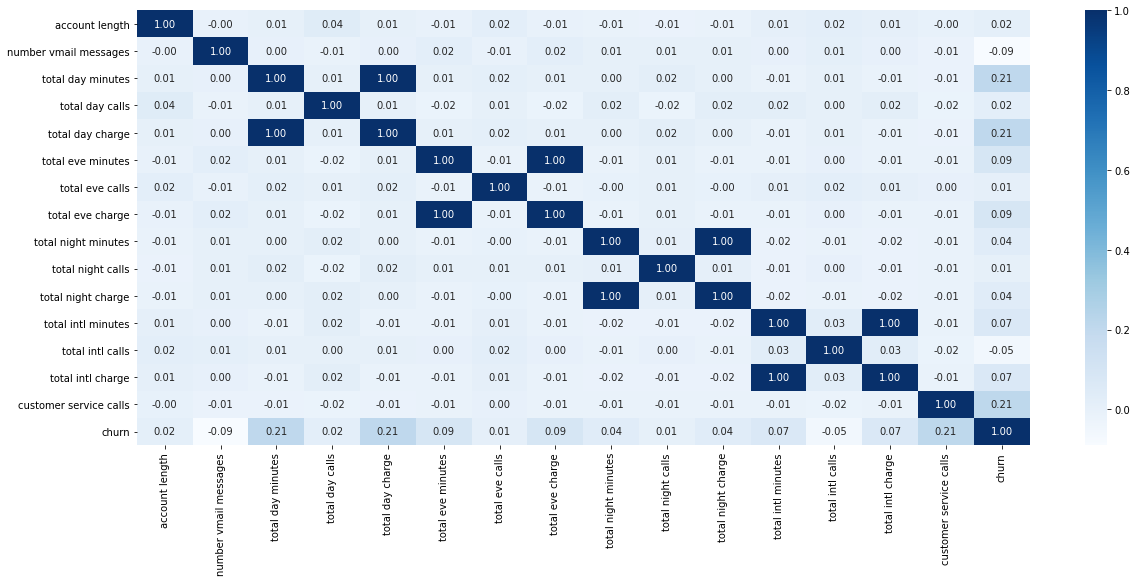

In [15]:
# check correlated features
plt.figure(figsize=(20,8))
sns.heatmap(df.corr(),annot=True,fmt='.2f',cmap='Blues');

- total day charge and total day minutes have a perfect correlation suggesting total day charge might be derived from total day minutes.similarly total evening/night/international minutes and their charges sre perfectly correlated.We will need to remove one of the features that are pefectly correlated ro remove multicolinearity in machine learning models
- total day minutes and customer service calls have highest correlation with churn in this dataset. This could mean that  high usage could lead to higher bills,casuing dissatisfaction. High no of customer service calls also shows dissatisfaction which could lead to customer churn.


In [16]:
# remove correlated features

#compute the correlation matrix
corr_matrix = df.corr().abs()

#set correlation threshold
threshold = 0.9

#create an upper triangle matrix to avoid duolicate checks
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape),k=1).astype(bool))
to_drop = [column for column in upper.columns if any(upper[column] > threshold)]

#drop correlated columns
df= df.drop(columns =to_drop)
print(f'Removed correlated features: {to_drop}')

Removed correlated features: ['total day charge', 'total eve charge', 'total night charge', 'total intl charge']


In [17]:
# make a copy of the cleaned dataframe
customer_churn = df.copy(deep=True)
customer_churn

,state,account length,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total eve minutes,total eve calls,total night minutes,total night calls,total intl minutes,total intl calls,customer service calls,churn
0,KS,128,no,yes,25,265.1,110,197.4,99,244.7,91,10.0,3,1,False
1,OH,107,no,yes,26,161.6,123,195.5,103,254.4,103,13.7,3,1,False
2,NJ,137,no,no,0,243.4,114,121.2,110,162.6,104,12.2,5,0,False
3,OH,84,yes,no,0,299.4,71,61.9,88,196.9,89,6.6,7,2,False
4,OK,75,yes,no,0,166.7,113,148.3,122,186.9,121,10.1,3,3,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,AZ,192,no,yes,36,156.2,77,215.5,126,279.1,83,9.9,6,2,False
3329,WV,68,no,no,0,231.1,57,153.4,55,191.3,123,9.6,4,3,False
3330,RI,28,no,no,0,180.8,109,288.8,58,191.9,91,14.1,6,2,False
3331,CT,184,yes,no,0,213.8,105,159.6,84,139.2,137,5.0,10,2,False


### 4.0 Exploratory Data Analysis

#### Visualize numeric variables

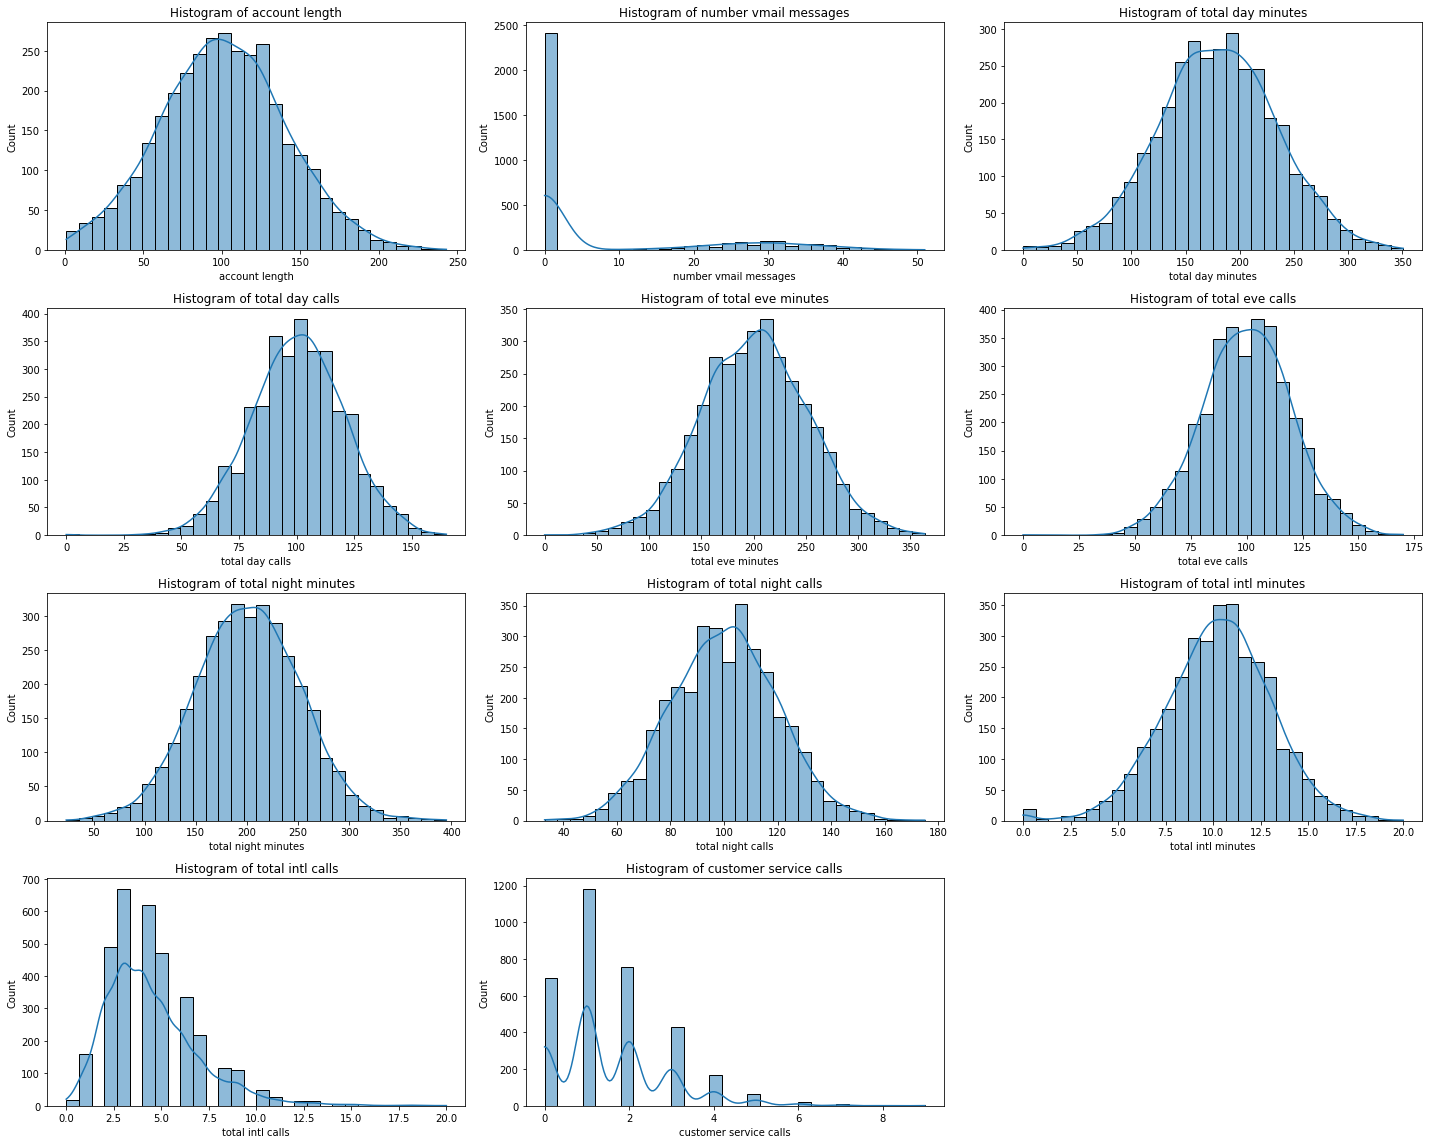

In [18]:

 # Select numerical columns
numerical_columns = df.describe().columns 

def plot_histograms(columns,cols_per_row = 3):
    num_cols = len(columns)
    num_rows = int(np.ceil(num_cols/cols_per_row)) #calculate required rows
    
    fig, ax = plt.subplots(nrows=num_rows,ncols=cols_per_row,figsize=(20,num_rows*4))
    ax = ax.flatten()
    
    for i,col in enumerate(columns):
        sns.histplot(df[col],bins=30,kde=True,ax=ax[i])
        ax[i].set_title(f'Histogram of {col}')
        
    #Hide any unused subplots (if number of columns is not a multiple of 3)
    for j in range(i+1, len(ax)):
        ax[j].axis('off')

        plt.tight_layout(); #prevents overlapping

#call function
plot_histograms(numerical_columns)

total day/evening/night calls/minutes- Distributions appear to be normally distributed,suggesting customers have a typical range of call durations

Number of voice mail mesages and customer sevice callsare right skewed meaning most customers have low values but few have higher counts

Total international calls and minutes are right-skewed indicating most customers make very few international calls

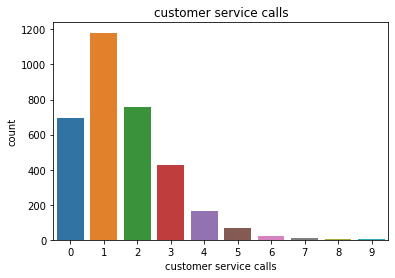

In [40]:
#Distribution of customer service calls
#function to plot countplot
def countplot(x):
    sns.countplot(data=df,x=x);
    plt.title(x)
    
countplot('customer service calls')

Most customers called the customer service once(approximately 1200) customers.A significant number almost 800 customers never called at all. Only a few customers(less than 50) called the customer care more than 6 times. The distributiion is right skewd meaning that a small number of users call the customer care excessively

#### Visualize categorical variables

In [33]:
df.describe(include='O')

,state,international plan,voice mail plan
count,3333,3333,3333
unique,51,2,2
top,WV,no,no
freq,106,3010,2411


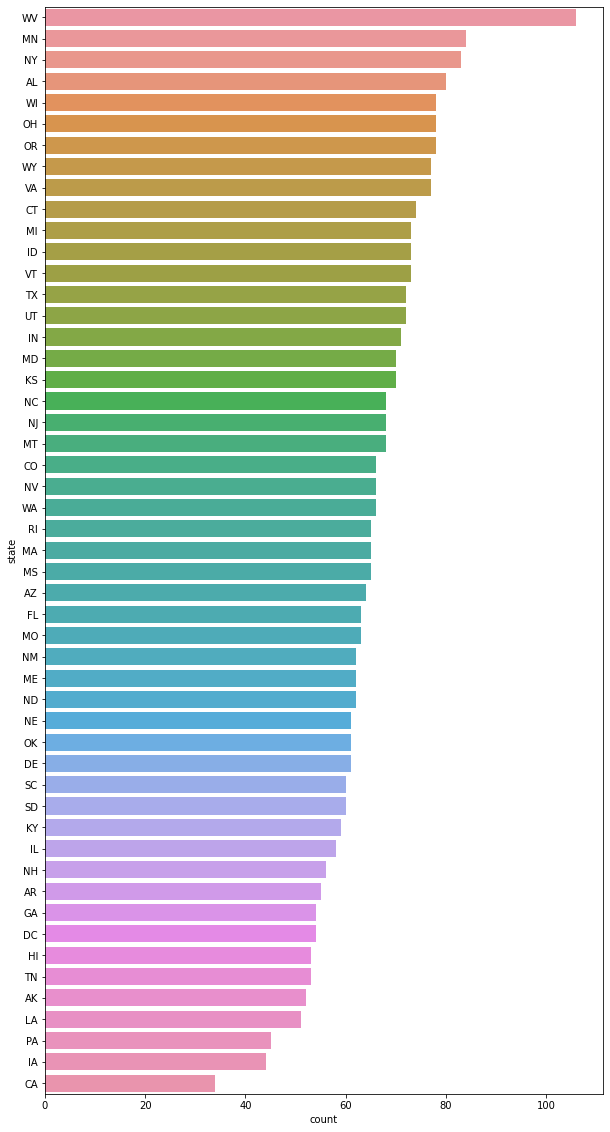

In [49]:
#states
plt.figure(figsize=(10,20))
sns.countplot(data=df,y='state',order=df['state'].value_counts().index);

wv state has the highest number of customers while CA has the least, we will need to check if churn is affected by state a customer lives in

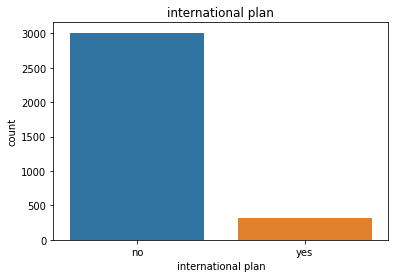

In [51]:
#international plan
countplot('international plan')

Majority of the customers donot gave an international plan

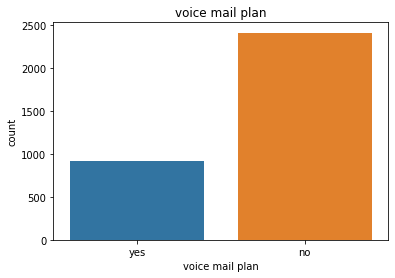

In [53]:
#voice mail plan
countplot('voice mail plan')

 huge percentage of customers lack the voice mail plan

False    0.855086
True     0.144914
Name: churn, dtype: float64


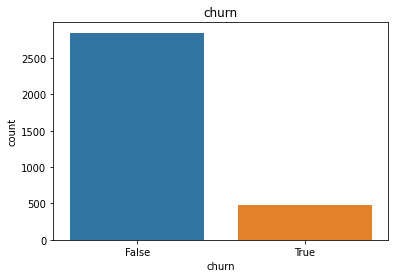

In [58]:
#churn
print(df.churn.value_counts(normalize=True))
countplot('churn')

of the 3333 customers in the dataset, 14.5% have terminated their contact with the company.The distribution of the target variable shows data imbalance.This needs to be adresed before modeliing as an unbalanced feature may cause the model to make false predictions

#### Bivariate analysis

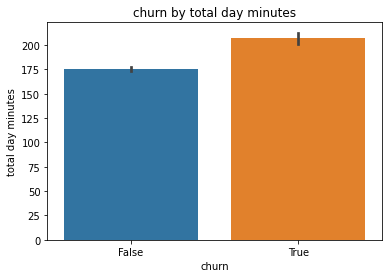

In [70]:
#function to plot barplots for customer churn
def barplot(yaxis):
    sns.barplot(data=df, y=yaxis,x='churn')
    plt.title(f'churn by {yaxis}')
#total day minutes by churn
barplot('total day minutes')

Number of customers who churned actually had more day minutes

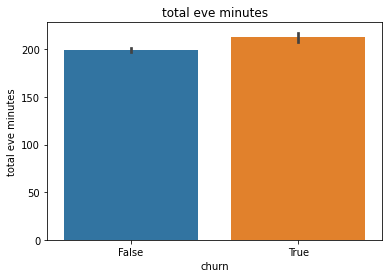

In [62]:
#Churn by Total evening minutes
barplot('total eve minutes')

slighly hire churn on total evening minutes

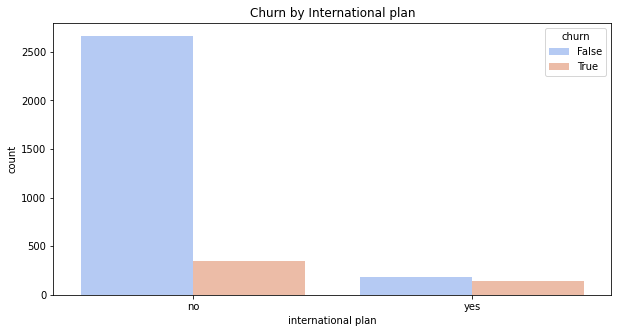

In [64]:
#Churn by International plan
plt.figure(figsize=(10, 5))
sns.countplot(data=df, x='international plan', hue='churn', palette='coolwarm')
plt.title("Churn by International plan");

Most customers did not have an international plan and most of them did not churn. Those with international plan have the same rate of churn, meaning higher churn rate in this group

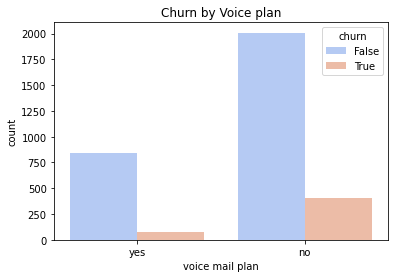

In [68]:
#Churn by Voice plan
sns.countplot(data=df, x='voice mail plan', hue='churn', palette='coolwarm')
plt.title("Churn by Voice plan");

Many customers have no voice plan and many and majority did not churn. Those with voice mail plan many of them did not churn

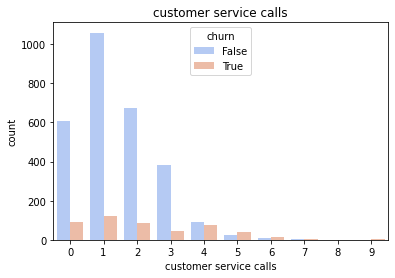

In [71]:
#churn by customer service calls
sns.countplot(data=df, x='customer service calls', hue='churn', palette='coolwarm')
plt.title("churn by customer service calls");

Majority of customers have made 0,1 0r 2 calls to customer service. Most of these customers did not churn.As the number of calls increased the proportion of churned customers increased

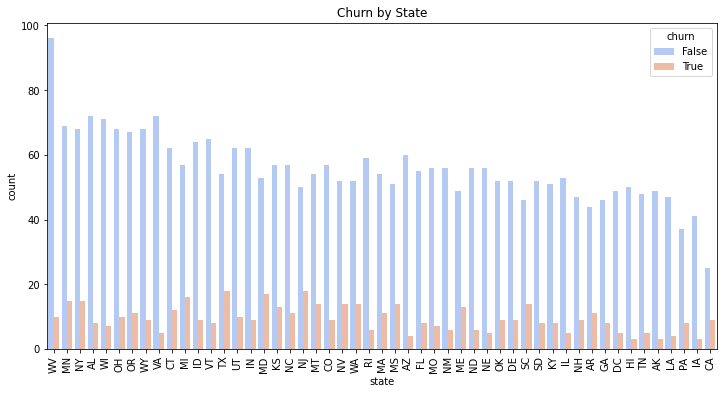

In [75]:
#churn  by state
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='state', hue='churn', palette='coolwarm', order=df['state'].value_counts().index)
plt.xticks(rotation=90)
plt.title("Churn by State")
plt.show()

Churn is spread across all states. No state has zero churn, meaning churn is a universal issues accross locations.Some Sates have higher churn rates

### 5.0 Modelling

In [77]:
#define feature columns
X = df.drop(columns='churn')
y = df['churn']

#split data into training and test sets
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,shuffle=True,stratify = y)

In [95]:
#use column transformers to perform processing for different columns
categorical_features = X.select_dtypes(include='O').columns
numerical_features = X.select_dtypes(include=['int','float']).columns

#define log transformer
log_transformer = FunctionTransformer(np.log1p)
#define transformer
transformer = ColumnTransformer([
    ('ohe',OneHotEncoder(handle_unknown='ignore'),categorical_features), #Encode categorical variables
    ('log_transform',log_transformer,['total intl calls','customer service calls']), #log transformation on skewed data
    ('scaler',StandardScaler(),numerical_features) #scale numerical features
])

In [96]:
pipe = ImbPipeline([
    ('preprocessor',transformer),
    ('smote',SMOTE(sampling_strategy='auto',random_state=42)),
    ('model',LogisticRegression(solver='liblinear'))
])
pipe.fit(X_train,y_train)
y_pred = pipe.predict(X_test)
print(classification_report(y_true = y_test,y_pred=y_pred))

              precision    recall  f1-score   support

       False       0.96      0.82      0.88       570
        True       0.43      0.81      0.56        97

    accuracy                           0.82       667
   macro avg       0.70      0.82      0.72       667
weighted avg       0.89      0.82      0.84       667



We have defined churn as our target variable, with all other columns serving as feature variables. After performing a train-test split, we divided the dataset into training and testing sets.

To ensure proper preprocessing, we used a ColumnTransformer to apply different transformations based on data types:

One-hot encoding for categorical features
Log transformation for right-skewed numerical features
Scaling for numerical features, as they have different scales
To streamline both data transformation and modeling, we implemented an ImbalancedPipeline (ImbPipeline). This allows us to handle imbalanced data using resampling techniques such as SMOTE, ensuring better model performance on minority classes.

In [97]:
#function to fit, predict and evaluate
def modelling(pipe):
    pipe.fit(X_train, y_train)

    # Predict train and test data
    y_hat_train = pipe.predict(X_train)
    y_hat_test = pipe.predict(X_test)
    
    # Get accuracy, precision, recall, and F1-score
    train_accuracy = accuracy_score(y_train, y_hat_train)
    test_accuracy = accuracy_score(y_test, y_hat_test)
    train_precision = precision_score(y_train, y_hat_train, average='weighted')
    test_precision = precision_score(y_test, y_hat_test, average='weighted')
    train_recall = recall_score(y_train, y_hat_train, average='weighted')
    test_recall = recall_score(y_test, y_hat_test, average='weighted')
    train_f1 = f1_score(y_train, y_hat_train, average='weighted')
    test_f1 = f1_score(y_test, y_hat_test, average='weighted')
    
    # Get prediction probabilities for AUC score
    y_pred_proba = pipe.predict_proba(X_test)[:, 1]
    test_roc_auc = roc_auc_score(y_test, y_pred_proba) 
    
     # Compute ROC curve
    fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
    
    # Plot ROC Curve
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color='blue', label=f'ROC Curve (AUC = {test_roc_auc:.4f})')
    plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Diagonal reference line
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.grid();
    
    return {
        'Training Accuracy': train_accuracy,
        'Test Accuracy': test_accuracy,
#         'Training precision': base_train_precision,
        'Test precision': test_precision,
#         'Training recall': base_train_recall,
        'Test recall': test_recall,
#         'Training f1_score': base_train_f1,
        'Test f1_score': test_f1,
        'Test AUC': test_roc_auc
    }

{'Training Accuracy': 0.7996999249812453,
 'Test Accuracy': 0.8170914542728636,
 'Test precision': 0.885571169164097,
 'Test recall': 0.8170914542728636,
 'Test f1_score': 0.837718867592498,
 'Test AUC': 0.8652378368601917}

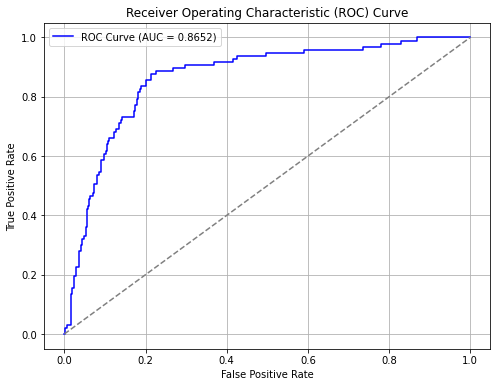

In [98]:
#Logistic Regression(basemodel)
logreg = modelling(pipe)
logreg

{'Training Accuracy': 0.9474868717179294,
 'Test Accuracy': 0.9010494752623688,
 'Test precision': 0.9056242906584091,
 'Test recall': 0.9010494752623688,
 'Test f1_score': 0.9030368990413694,
 'Test AUC': 0.9067100741544583}

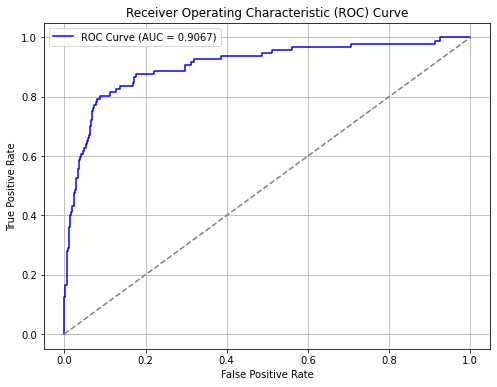

In [110]:
#Support Vector Machine
pipe.set_params(model=svm.SVC(probability=True))
svm = modelling(pipe)
svm

{'Training Accuracy': 1.0,
 'Test Accuracy': 0.9070464767616192,
 'Test precision': 0.9143296311334445,
 'Test recall': 0.9070464767616192,
 'Test f1_score': 0.9099259724484479,
 'Test AUC': 0.8472327726532827}

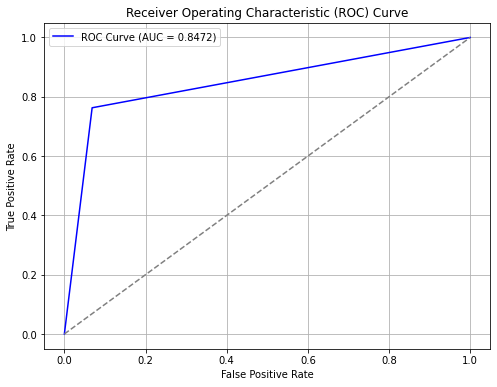

In [101]:
#Decision Tree
from sklearn.tree import DecisionTreeClassifier
pipe.set_params(model=DecisionTreeClassifier())
dt = modelling(pipe)
dt

{'Training Accuracy': 1.0,
 'Test Accuracy': 0.9490254872563718,
 'Test precision': 0.947953907661554,
 'Test recall': 0.9490254872563718,
 'Test f1_score': 0.9483455053135125,
 'Test AUC': 0.9393832519442937}

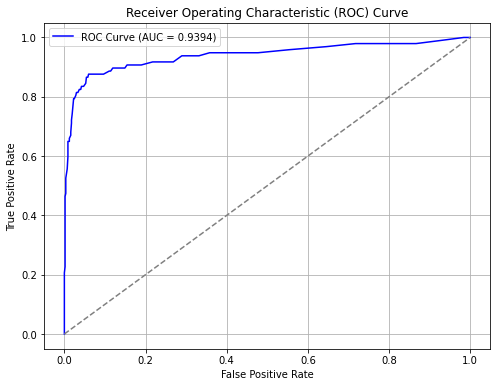

In [104]:
#Random Forest
pipe.set_params(model=RandomForestClassifier())
rf =modelling(pipe)
rf

{'Training Accuracy': 0.9996249062265566,
 'Test Accuracy': 0.95952023988006,
 'Test precision': 0.9588325402516134,
 'Test recall': 0.95952023988006,
 'Test f1_score': 0.9590731770733473,
 'Test AUC': 0.9319768493398445}

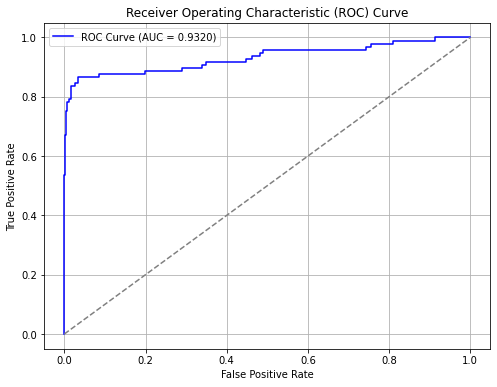

In [107]:
pipe.set_params(model=XGBClassifier())
xgb =modelling(pipe)
xgb

In [111]:
#Create a dataframe for all items
#Dictionary of model resuts
model_results = {
    "Logistic Regression": logreg,
    "Random Forest": rf,
    "Decision Tree": dt,
    "SVM": svm,
    'XGB':xgb
}

#convert dictionary to dataframe
df_results = pd.DataFrame.from_dict(model_results,orient='index')

#Display the Dataframe
df_results

,Training Accuracy,Test Accuracy,Test precision,Test recall,Test f1_score,Test AUC
Logistic Regression,0.799700,0.817091,0.885571,0.817091,0.837719,0.865238
Random Forest,1.000000,0.949025,0.947954,0.949025,0.948346,0.939383
Decision Tree,1.000000,0.907046,0.914330,0.907046,0.909926,0.847233
SVM,0.947487,0.901049,0.905624,0.901049,0.903037,0.906710
XGB,0.999625,0.959520,0.958833,0.959520,0.959073,0.931977


In [112]:
df_results['Training Accuracy'] - df_results['Test Accuracy']

Logistic Regression   -0.017392
Random Forest          0.050975
Decision Tree          0.092954
SVM                    0.046437
XGB                    0.040105
dtype: float64

XGB is the best performing model.despite overfitting(Training accuracy almost 100%) it performs well on test data

XGB has a small difference between train and test acuracy

In [115]:
#use cross validation to check whether it improves scores than a train test split

#Define the model
model = pipe.set_params(model=XGBClassifier())
skf = StratifiedKFold(n_splits = 5, shuffle=True,random_state=42)

#perform 5-Fold Cross-Validation
cv_scores = cross_val_score(model,X_train,y_train,cv=skf,scoring='accuracy')

#print results
print(f'Cross-Validation Scores: {cv_scores}')
print(f'Mean Accuracy: {cv_scores.mean():.4f}')

Cross-Validation Scores: [0.9494382  0.94746717 0.95309568 0.94559099 0.94934334]
Mean Accuracy: 0.9490


No much difference between split and cross validation, train_test_split performs slighlty better on adding shuffle and stratify

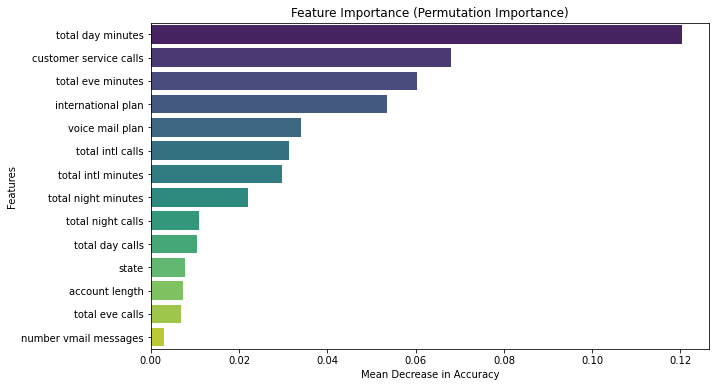

In [117]:
from sklearn.inspection import permutation_importance
model.fit(X_train,y_train)
perm_importance = permutation_importance(model, X_train, y_train, scoring='accuracy')

# Convert to pandas series
perm_importance_df = pd.Series(perm_importance.importances_mean, index=X.columns)
# Sort feature importance values
sorted_importance = perm_importance_df.sort_values(ascending=False)

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(x=sorted_importance, y=sorted_importance.index, palette="viridis")

# Labels and title
plt.xlabel("Mean Decrease in Accuracy")
plt.ylabel("Features")
plt.title("Feature Importance (Permutation Importance)")
plt.show()

In [121]:
perm_importance_df.sort_index(ascending=False)

voice mail plan           0.034059
total night minutes       0.021980
total night calls         0.010878
total intl minutes        0.029632
total intl calls          0.031358
total eve minutes         0.060240
total eve calls           0.006827
total day minutes         0.120405
total day calls           0.010503
state                     0.007802
number vmail messages     0.003076
international plan        0.053563
customer service calls    0.068042
account length            0.007352
dtype: float64